# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

In [3]:
### Although it is stated above that used of modules not loaded in this template is forbidden, 
### seaborn is being imported as usage of module was approved during live session 

import seaborn as sns

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [5]:
### Wine Quality (PMLB - red subset only) was the chosen data set to analyze for this project
### The .csv file for this dataset winequality-red.csv was updated to gitlab repo


df = pd.read_csv('winequality-red.csv', delimiter=';') # Loading the .csv file using Pandas Framework and storing the DataFrame in the variable df 
### Since file was loaded directly to the gitlab repo in the same directory as the this .ipynb file, only the file name is needed and not the path.

### Initially used df.head() to inspect the data loaded to the DataFrame and realized that delimiter ';' needed
### to be added in order to be able to view the data in a correct manner. 


### It is possible to used df.head(n=10) to show 10 rows of data from the Data Frame but the same rows
### will appear everytime which is not a random sample. Therefore df.sample was used instead.


rows_10 = df.sample(n=10) # Select a sample of 10 rows from the dataframe df and store in variable row_10. Everytime code is run, a new sample of 10 rows is returned.
rows_10

### Need to check the dataset to confirm if it has any missing data. 
### Checking out infomation of dataset using df.info() and storing column df_info
df.info() 

### command shows that there are 1599 entries from index 0 to 1598 and all columns have a non_null count of 1599
### from this information it doesn't seem like there is any missing data in this dataset

df.isnull().sum().sum() # Gathers total sum where column values are null
### no columns were returned with null values 

df.isna().sum().sum() # Gathers total sum where column values are na
### col


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


np.int64(0)

<Axes: >

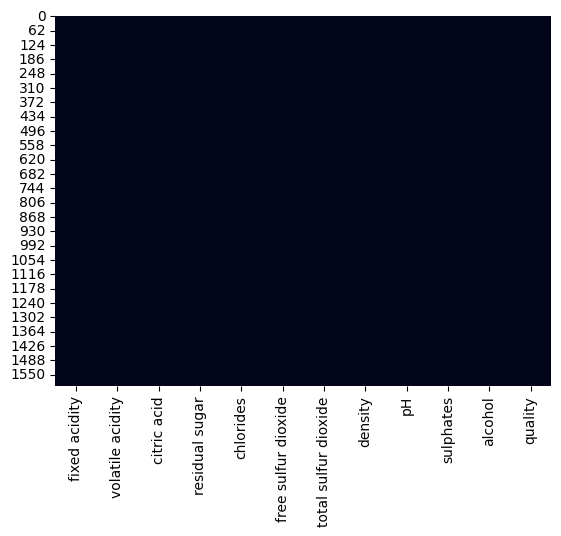

In [6]:
## Thought it would be fun to visualize the lack of nulls. 
sns.heatmap(df.isnull(), cbar=False)

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [7]:
### First need to take to df created in Problem 1 and list out all of the columns being used in this dataset
### Although df.info() can be used to return the column names from the dataset as seen in the Problem above, will 
### use just df.columns to gather just the column listed own there own without any other information that was not asked for 


df.columns

### add tolist to df.columns to return the results in a way that is simpler to read 

column_list = df.columns.tolist() # Store column list for red_wine dataset in variable column_list

### need to describe the columns from dataset using the above method in my own words
### want store this information and display it as some kind of table that is easy to read and understand

df.columns.tolist()

### As per instructions listed in Problem 1, only need to complete the descriptions for the first 10 columns but 
### there is only 12 columns in total so I will simply add the descriptions for all. 
### Check to see if there is a way to add how these columns are being derived 

#'fixed acidity' : The amount of non-floating acid in the wine, which can not be easily evaporated
#'volatile acidity' : The amount of floating acid in the wine, which can effect the smell of the wine
# 'citric acid' : Acid the adds zesty flavor to wine
# 'residual sugar' : Total sugar left over after frementation process have completed
# 'chlorides' : Common salt content featured in the wine
# 'free sulfur dioxide' : Agent added to wine which helps prevent it from spoiling that is free and not currently working 
# 'total sulfur dioxide' : Total agents added to wine which helps prevent it from spoiling that is free and currently working
# 'density' : Thickness of the wine mainly determined by how much alchol and sugar content it contains
# 'pH' : A scale from acidic (0) to basic (14)
# 'sulphates' : Agent added to wine which helps prevents oxidization and growth of microorganisms 
# 'alcohol' : The percentage of alchol in the wine
# 'quality' : Rating of wine based on taste from a scale of 0 to 10 (with 0 being the worst and 10 being the best) 

column_description = ['The amount of non-floating acid in the wine, which can not be easily evaporated',
                      'The amount of floating acid in the wine, which can effect the smell of the wine',
                      'Acid that adds zesty flavor to wine',
                      'Total sugar left over after frementation process have completed',
                      'Common salt content featured in the wine',
                      'Agent added to wine which helps prevent it from spoiling that is free and not currently working',
                      'Total agents added to wine which helps prevent it from spoiling that is free and currently working',
                      'Thickness of the wine mainly determined by how much alchol and sugar content it contains',
                      'A scale from acidic (0) to basic (14)',
                      'Agent added to wine which helps prevents oxidization and growth of microorganisms',
                      'The percentage of alchol in the wine',
                      'Rating of wine based on taste from a scale of 0 to 10 (with 0 being the worst and 10 being the best)'
                      ]

### Want to create a table with 3 columns. Column Name, Data Type, Simplified Description 
### Also have the option to create a dictionary with column name as key and description as key value and print using that format


description = {
    'Column Names': column_list, #using list of column names stored in previous step
    'Data Type': ['float64','float64','float64','float64','float64','float64','float64','float64','float64','float64','float64','int64'],
    'Description': column_description # deciptions given in same order as column name to simplify the process
}

df_description = pd.DataFrame(description) # Create Data Frame of dictionary and store in variable

### Can used Data Frame to create a Markdown Table 

description_table = df_description.to_markdown(index=False, tablefmt="pipe") ## Issue with to_markdown as tabulate is not installed. Look for other solutions


print(description_table)


| Column Names         | Data Type   | Description                                                                                          |
|:---------------------|:------------|:-----------------------------------------------------------------------------------------------------|
| fixed acidity        | float64     | The amount of non-floating acid in the wine, which can not be easily evaporated                      |
| volatile acidity     | float64     | The amount of floating acid in the wine, which can effect the smell of the wine                      |
| citric acid          | float64     | Acid that adds zesty flavor to wine                                                                  |
| residual sugar       | float64     | Total sugar left over after frementation process have completed                                      |
| chlorides            | float64     | Common salt content featured in the wine                                                             |
| free

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


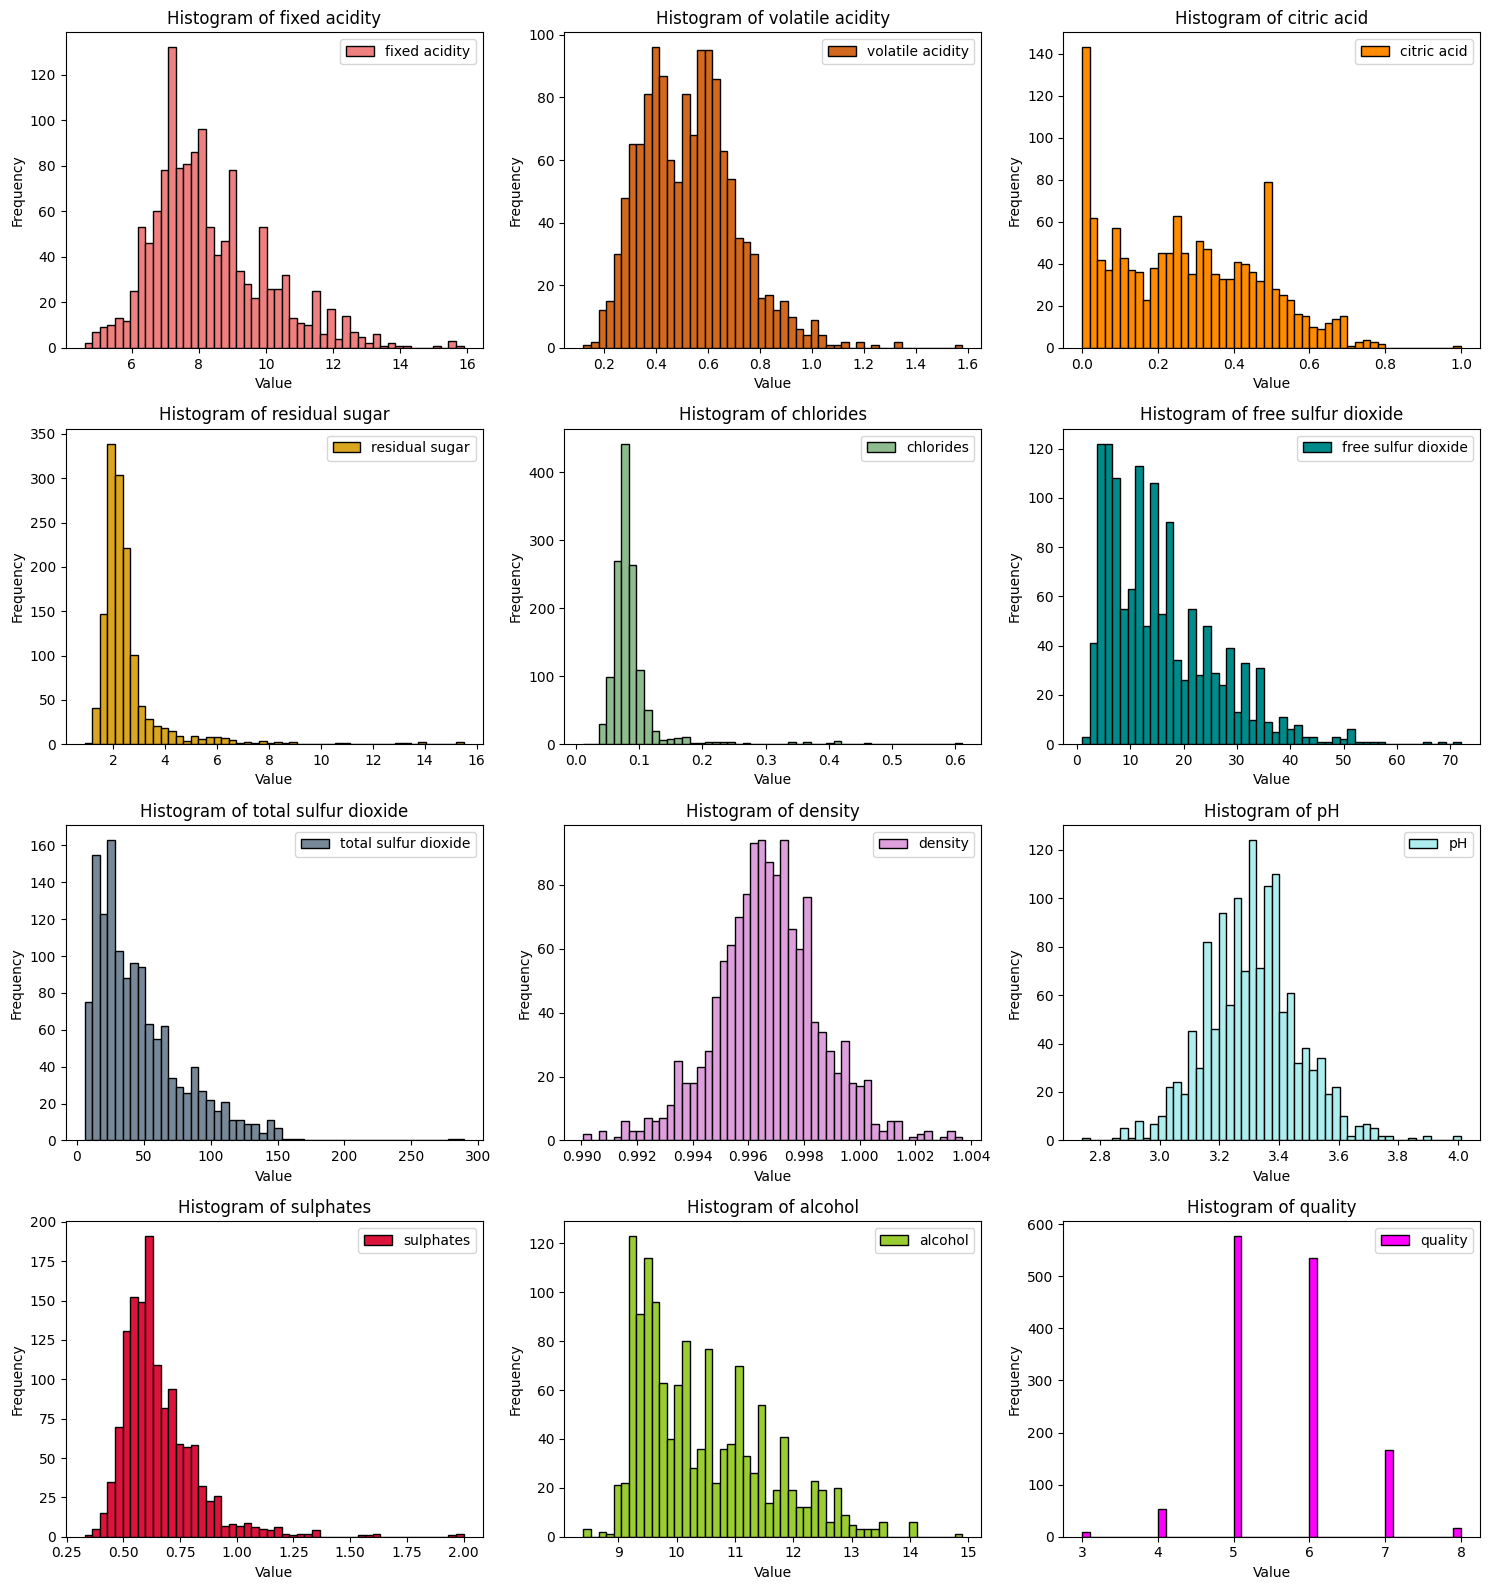

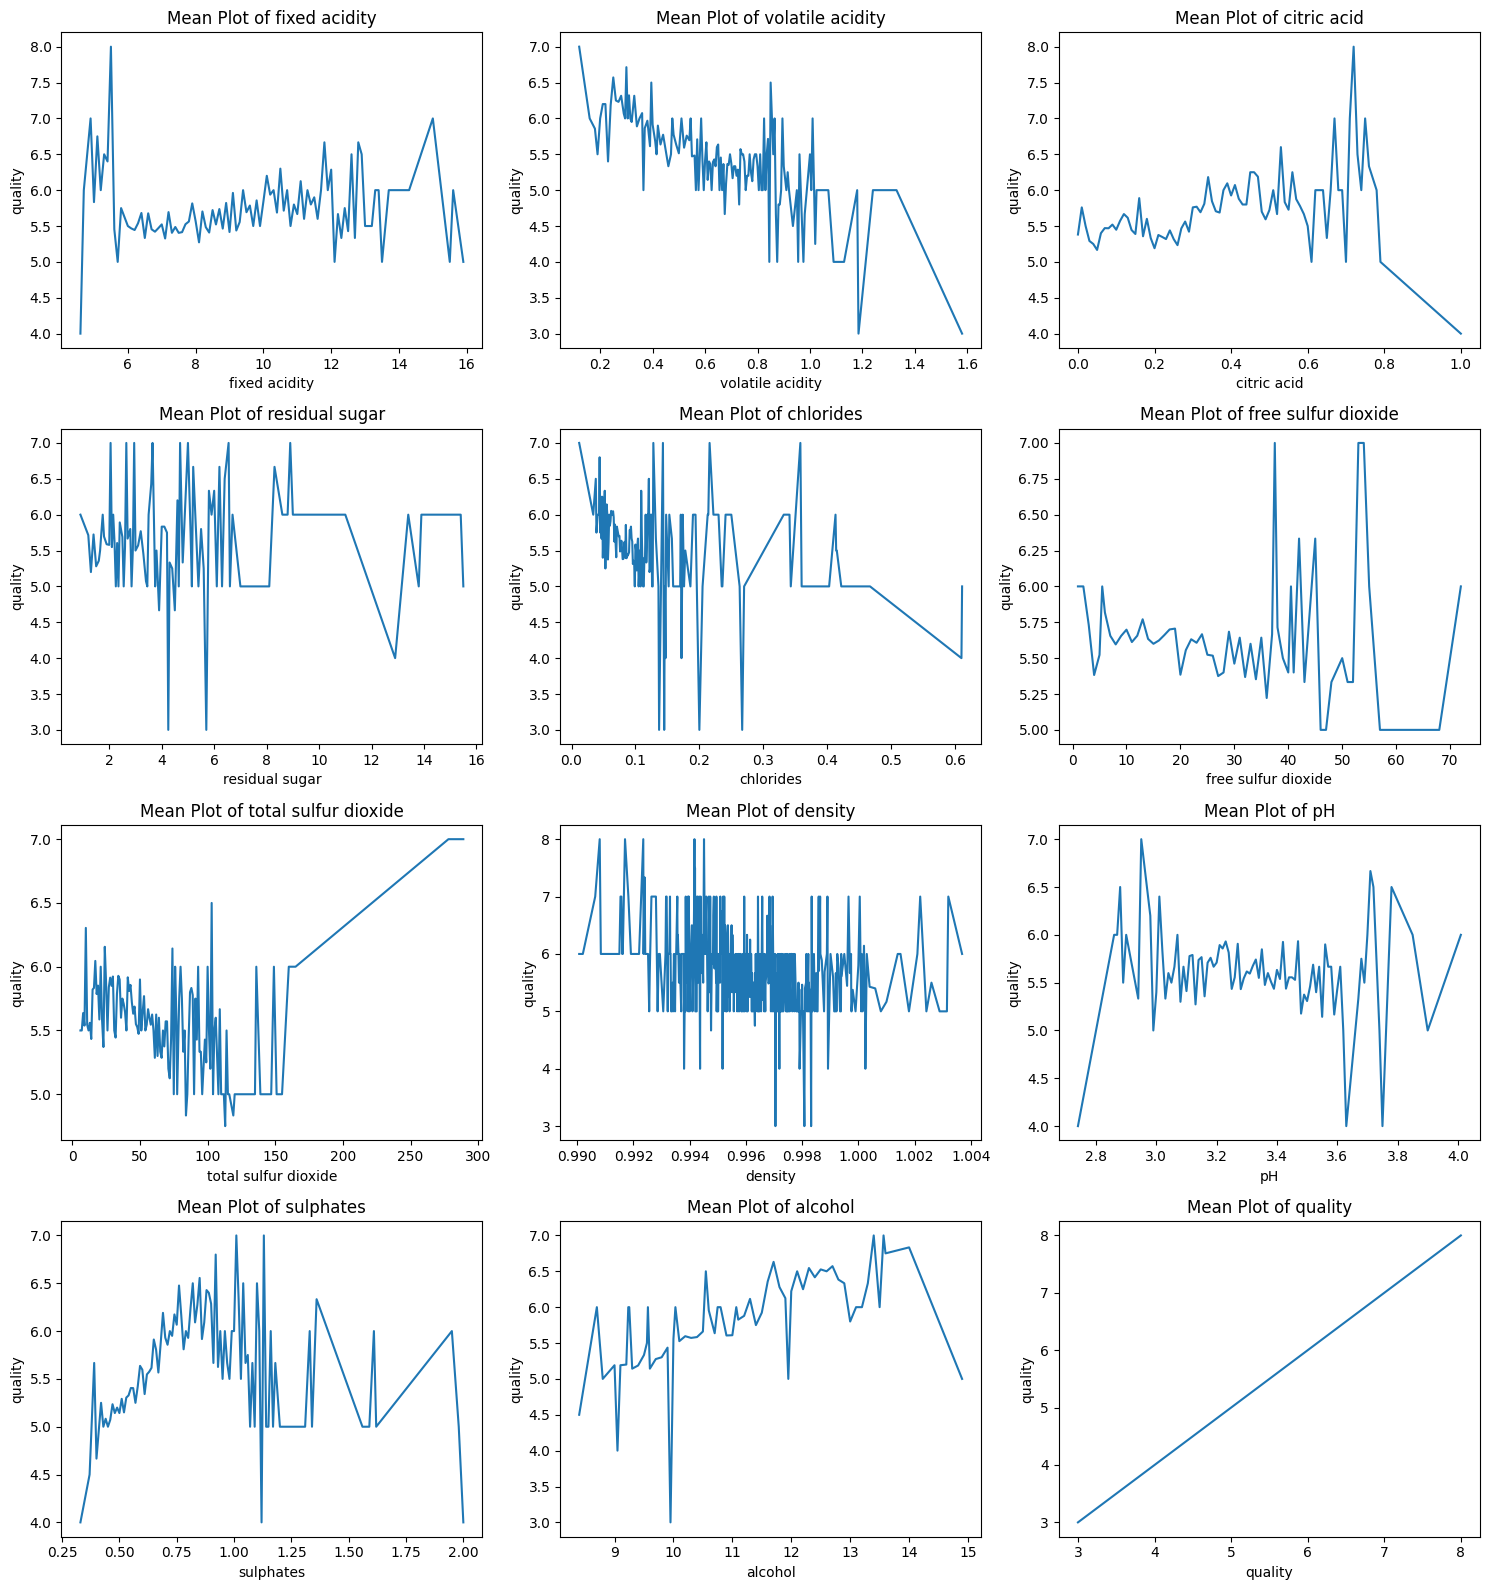

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

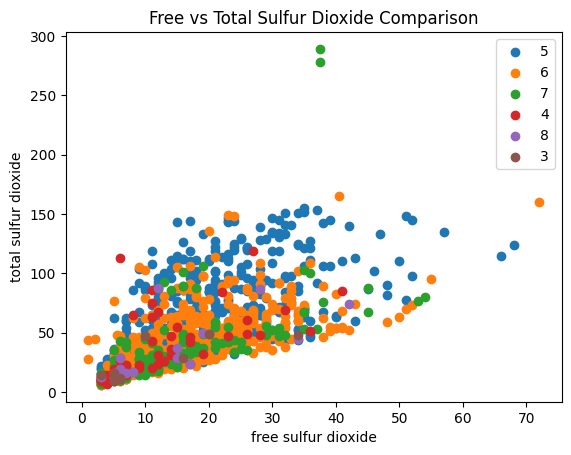

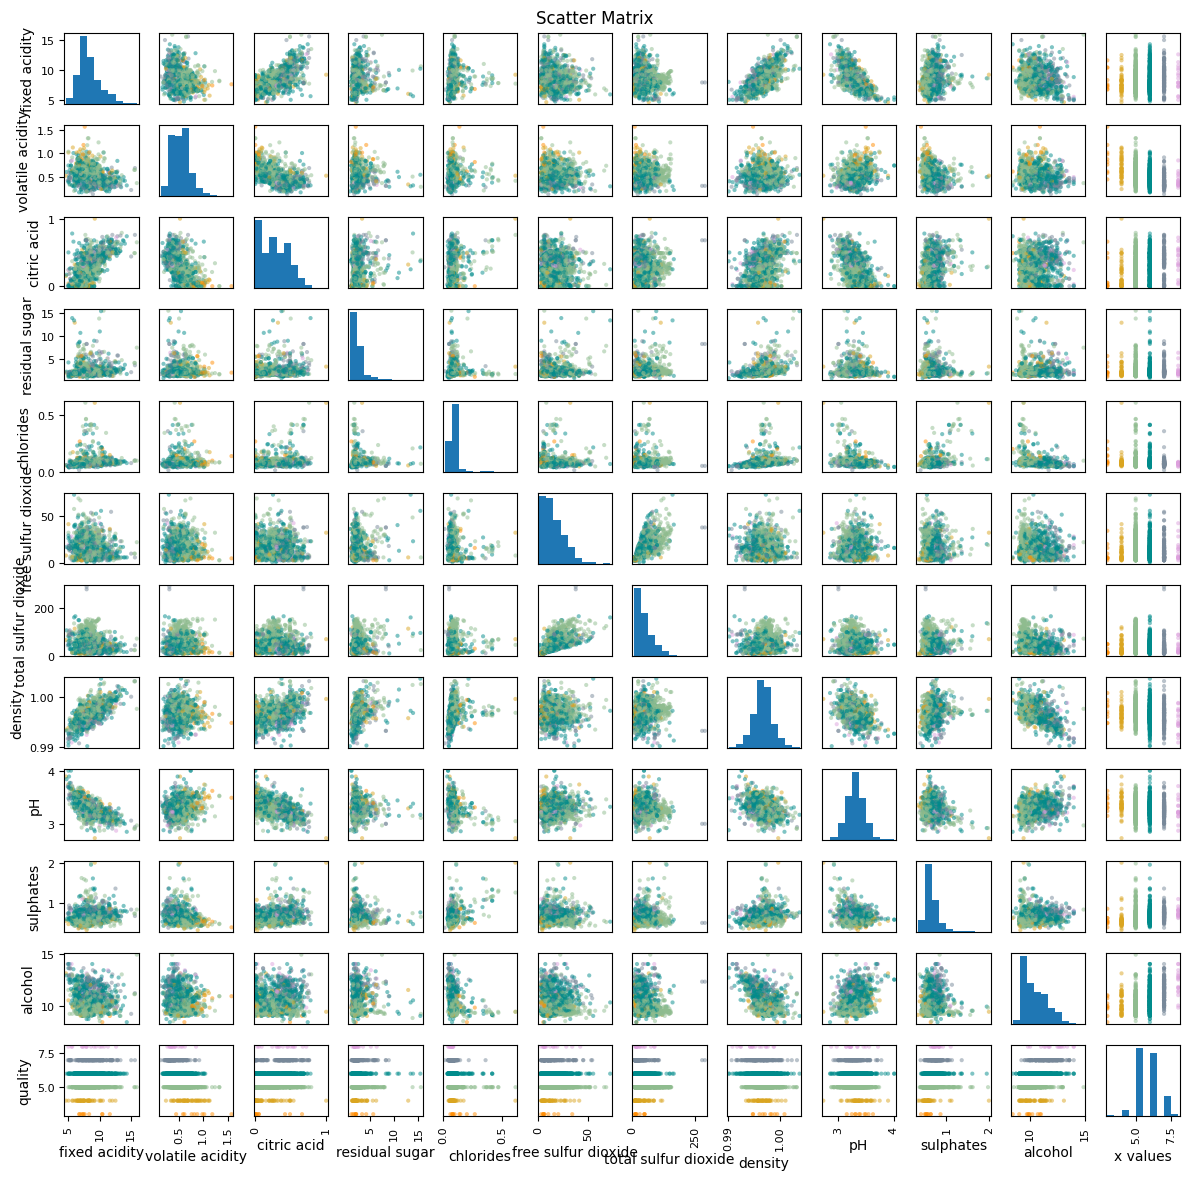

<Figure size 300x300 with 0 Axes>

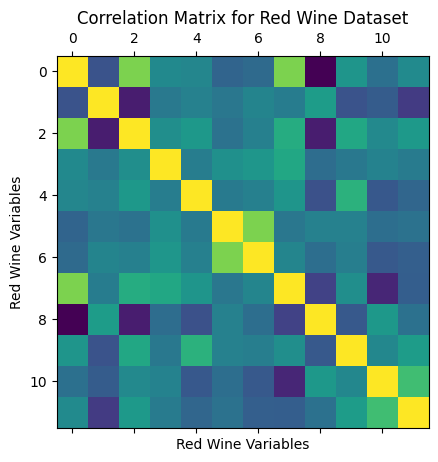

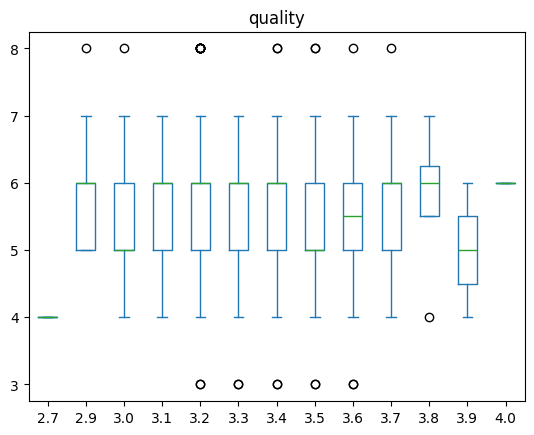

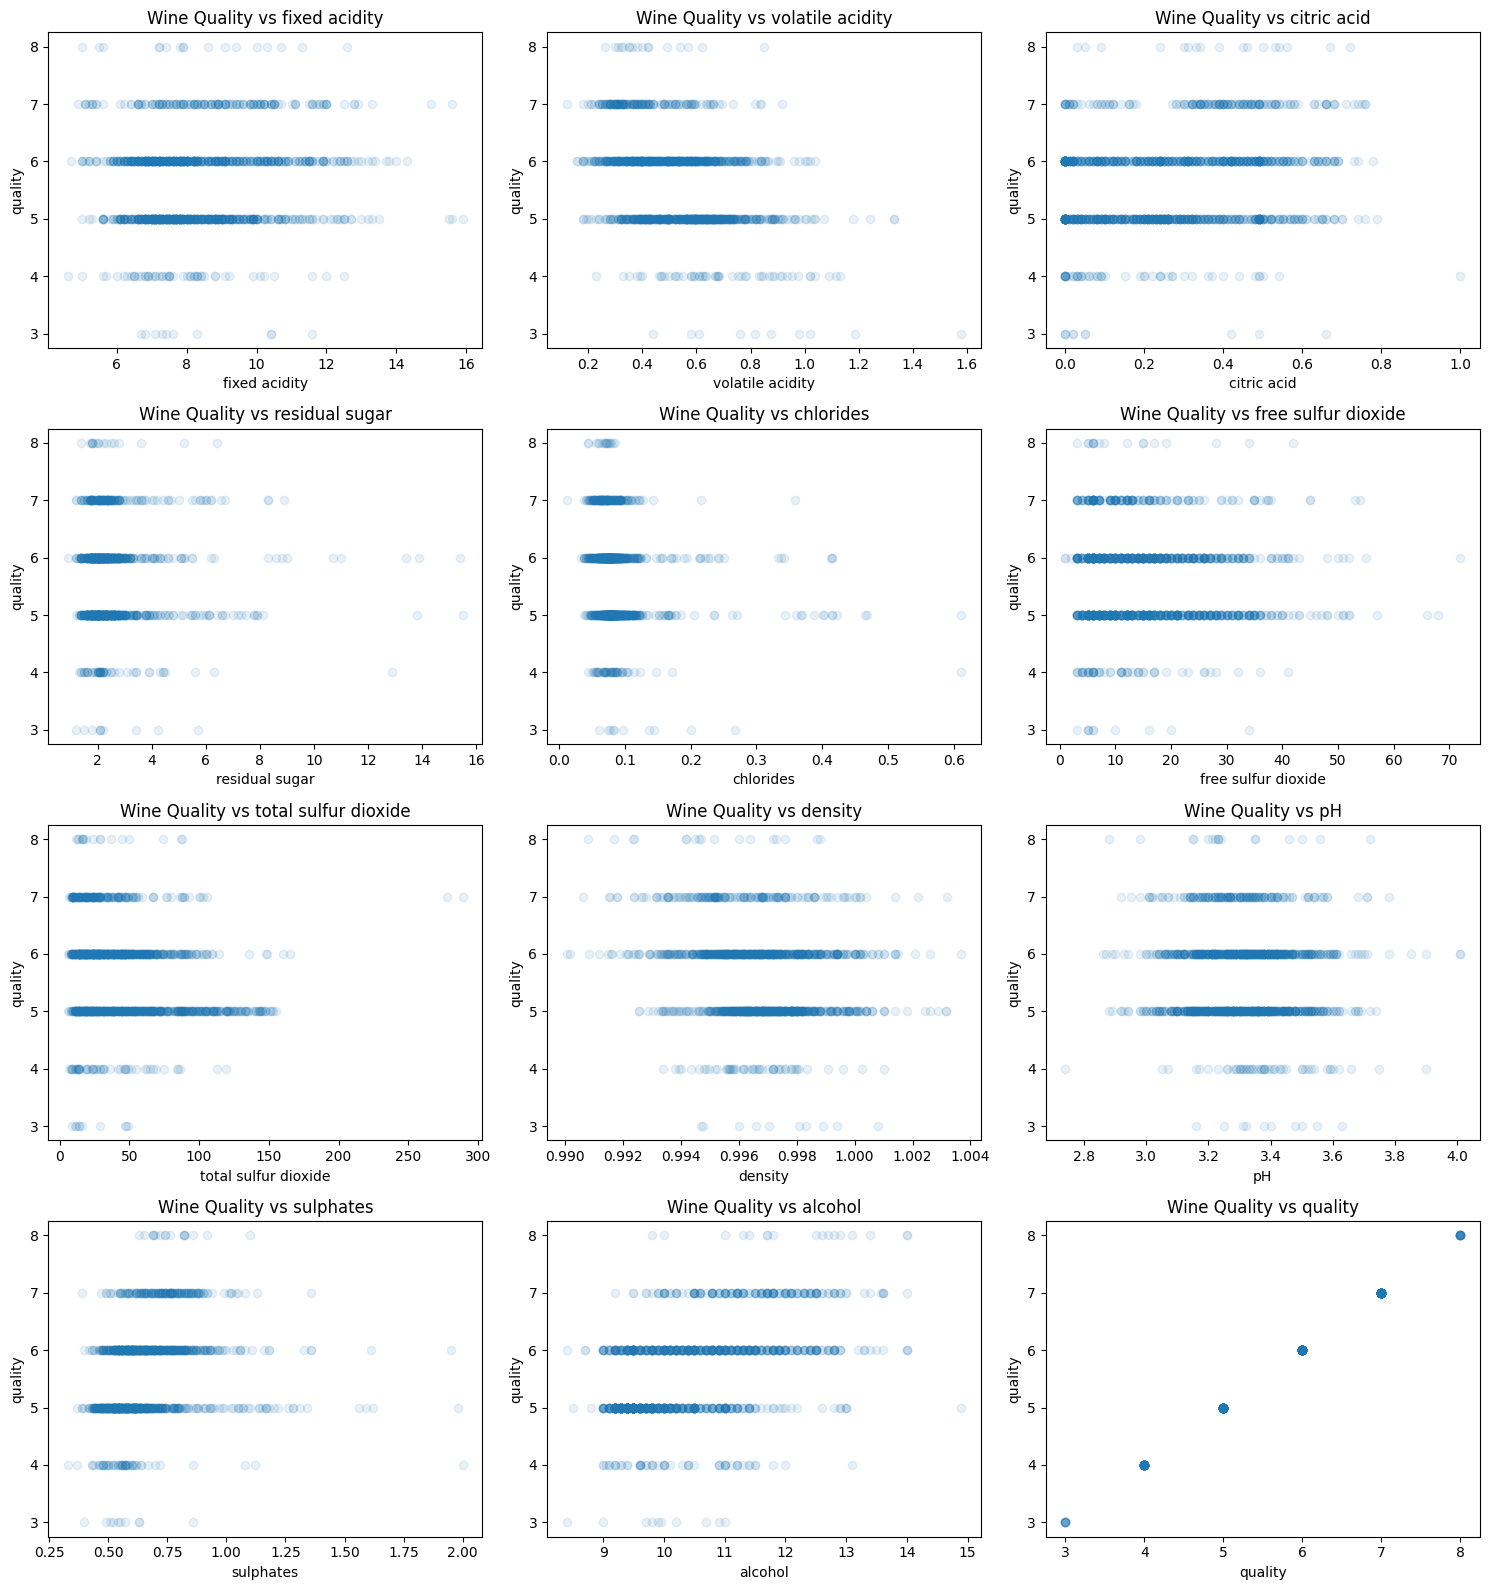

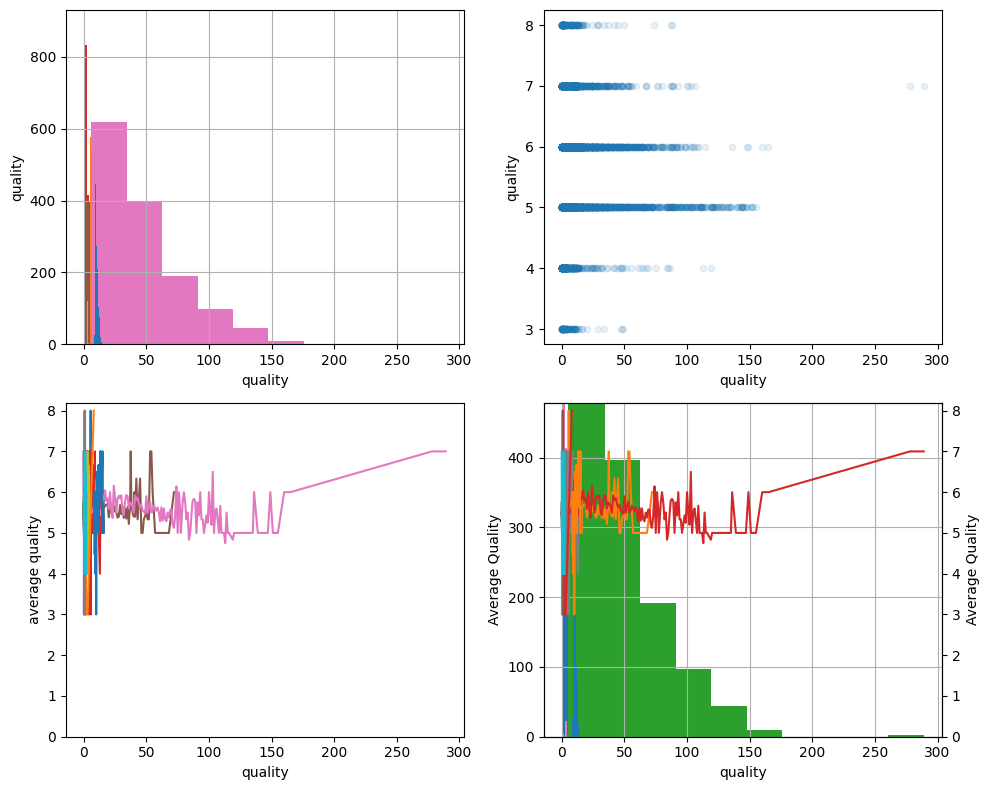

In [ ]:
#### Perform an exploratory analysis on the dataset
### Figure out what is in a dataset and whether it will be useful in the task at had

df # Preview dataset from the preview rows

### As a part of Problem 1 df.isnull() and df.isna() were also run to see if there was any missing data in the dataset

df.info() #Get data types of columns

### Check for duplicates records
df.duplicated().sum() # checks for duplicate data in the dataset. Returned 240 rows
df_without_duplicates = df.drop_duplicates() # Create variable for df without duplicate rows. Should be 240 rows less than original df

df_without_duplicates # Display dataframe after removal of duplicate rows

### Generate statics such as min, max, etc for non duplicated column

df_without_duplicates.describe() # Get stats on all numeric columns 
## No strings columns so .unique is not needed

df_without_duplicates.sample(n=5) # View 5 sample rows of the data 


### Create histogram for each column -- DONE
### Make a scatter correlation matrix ( each feature plotted against the target) -- DONE
### PCA with 2 components
### Chose 2 features to compare together against the target -- DONE


### Creating Histograms to Identify Outliers in Data

n_cols = 3 # Number of Columns for Subplots
n_rows = 4 # Number of Rows for Subplots  

fig,axs = plt.subplots(n_rows,n_cols,figsize=(5* n_cols, 4 * n_rows))
axs = axs.flatten()

colors=['lightcoral','chocolate','darkorange','goldenrod','darkseagreen','darkcyan','lightslategrey','plum','paleturquoise','crimson','yellowgreen','fuchsia']  

column_list # List of column names created in earlier Problem

for i, col in enumerate(column_list):
    ax = axs[i]
    ax.hist(df_without_duplicates[col], edgecolor='black', label=col, color=colors[i % len(colors)], bins=50)
    ax.legend();
    ax.set_title(f'Histogram of {column_list[i]}', fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency');

plt.tight_layout()
plt.show(); 
# Histogram can highligh dummy data, weird spikes in data, and missing values
# It not worried about correct title could have completed with just df_without_duplicates.hist(figsize=(8,8))

### Mean Plot

n_cols = 3 # Number of Columns for Subplots
n_rows = 4 # Number of Rows for Subplots

plt.figure(figsize=(5* n_cols, 4 * n_rows))
for i, col in enumerate(column_list):
    plt.subplot(n_rows, n_cols, i + 1)
    df_w = df_without_duplicates.groupby(col)['quality'].mean()
    df_w.plot(y='quality')
    plt.title(f'Mean Plot of {column_list[i]}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('quality')

plt.tight_layout()
plt.show(); 


### Pairs of Columns

x_column = 'free sulfur dioxide'
y_column = 'total sulfur dioxide'

for w in df_without_duplicates['quality'].unique():
    wine_w = df_without_duplicates.query("quality == @w")
    plt.scatter(wine_w[x_column],wine_w[y_column], label=w)
plt.title("Free vs Total Sulfur Dioxide Comparison")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend();

#### Scatter Matrix

quality_map = {1: 'lightcoral',2: 'chocolate',3: 'darkorange',4: 'goldenrod',5: 'darkseagreen',6: 'darkcyan',7: 'lightslategrey',8: 'plum',9: 'paleturquoise',10: 'crimson',11: 'yellowgreen',12: 'fuchsia'}  
df_colored = df_without_duplicates['quality'].map(quality_map).values
pd.plotting.scatter_matrix(df_without_duplicates, color=df_colored, figsize=(12,12))
plt.suptitle('Scatter Matrix')
plt.xlabel('x values')
plt.ylabel('y values')
plt.tight_layout();


### Correlation Chart

df_correlation = df_without_duplicates.corr(numeric_only=True)
print(df_correlation)


#### Correlation Matrix (Although used for Problem 4, this is an import step in exporatory analysis)

plt.figure(figsize=(3,3)) 
plt.matshow(df_without_duplicates.corr())
plt.title('Correlation Matrix for Red Wine Dataset')
plt.xlabel('Red Wine Variables')
plt.ylabel('Red Wine Variables');

### Column vs Target Box Plots


df_rounded = df_without_duplicates.copy()
df_rounded['pH'] = df_rounded['pH'].round(1)
df_rounded.plot.box(column='quality', by='pH')
None

### Column vs Target Scatter Plots

fig,axs = plt.subplots(n_rows,n_cols,figsize=(5* n_cols, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(column_list):

    ax=axs[i]

    ax.scatter(df_without_duplicates[col],df_without_duplicates["quality"], alpha=0.10)
    ax.set_xlabel(col)
    ax.set_ylabel('quality')
    ax.set_title(f'Wine Quality vs {col}', fontsize=12)

plt.tight_layout()
plt.show(); 


#### Multiple Charts in One
n_cols = 2
n_rows = 2

plt.figure(figsize=(5* n_cols, 4 * n_rows))
for i, col in enumerate(column_list):
    plt.subplot(n_rows, n_cols, 1)
    df_without_duplicates[col].hist()
    plt.xlabel(col)
    plt.ylabel('quality')

    plt.subplot(n_rows, n_cols, 2)
    df_without_duplicates.plot.scatter(col, "quality", alpha=0.10, ax=plt.gca())
    plt.xlabel(col)
    plt.ylabel('quality')

    plt.subplot(n_rows, n_cols, 3)
    df_without_duplicates_wine = df_without_duplicates.groupby(col)["quality"].mean()
    df_without_duplicates_wine.plot(y='quality')
    plt.ylabel('average quality')
    plt.gca().set_ylim(0)

    plt.subplot(n_rows, n_cols, 4)
    df_without_duplicates[col].hist(label='count')
    plt.ylabel('Wine Count')
    df_without_duplicates_wine.plot(y='quality', secondary_y=True)   
    plt.ylabel('Average Quality')
    plt.gca().set_ylim(0)

plt.tight_layout()
plt.show(); 
None; 

### After analysis is completed pick 3 individual charts that were interesting
### Repeat those charts after the analysis
### Creating Histograms to Identify Outliers in Data ### Describe what is noteworthy about the chart
# n_cols = 3 # Number of Columns for Subplots
# n_rows = 4 # Number of Rows for Subplots  

# fig,axs = plt.subplots(n_rows,n_cols,figsize=(5* n_cols, 4 * n_rows))
# axs = axs.flatten()

# colors=['lightcoral','chocolate','darkorange','goldenrod','darkseagreen','darkcyan','lightslategrey','plum','paleturquoise','crimson','yellowgreen','fuchsia']  

# column_list # List of column names created in earlier Problem

# for i, col in enumerate(column_list):
#     ax = axs[i]
#     ax.hist(df_without_duplicates[col], edgecolor='black', label=col, color=colors[i % len(colors)], bins=50)
#     ax.legend();
#     ax.set_title(f'Histogram of {column_list[i]}', fontsize=12)
#     ax.set_xlabel('Value')
#     ax.set_ylabel('Frequency');

# plt.tight_layout()
# plt.show(); 


### Mean Plot ### Describe what is noteworthy about the chart
# n_cols = 3 # Number of Columns for Subplots
# n_rows = 4 # Number of Rows for Subplots

# plt.figure(figsize=(5* n_cols, 4 * n_rows))
# for i, col in enumerate(column_list):
#     plt.subplot(n_rows, n_cols, i + 1)
#     df_w = df_without_duplicates.groupby(col)['quality'].mean()
#     df_w.plot(y='quality')
#     plt.title(f'Mean Plot of {column_list[i]}', fontsize=12)
#     plt.xlabel(col)
#     plt.ylabel('quality')

# plt.tight_layout()
# plt.show(); 

#### Scatter Matrix ### Describe what is noteworthy about the chart

# quality_map = {1: 'lightcoral',2: 'chocolate',3: 'darkorange',4: 'goldenrod',5: 'darkseagreen',6: 'darkcyan',7: 'lightslategrey',8: 'plum',9: 'paleturquoise',10: 'crimson',11: 'yellowgreen',12: 'fuchsia'}  
# df_colored = df_without_duplicates['quality'].map(quality_map).values
# pd.plotting.scatter_matrix(df_without_duplicates, color=df_colored, figsize=(12,12))
# plt.suptitle('Scatter Matrix')
# plt.xlabel('x values')
# plt.ylabel('y values')
# plt.tight_layout();




YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

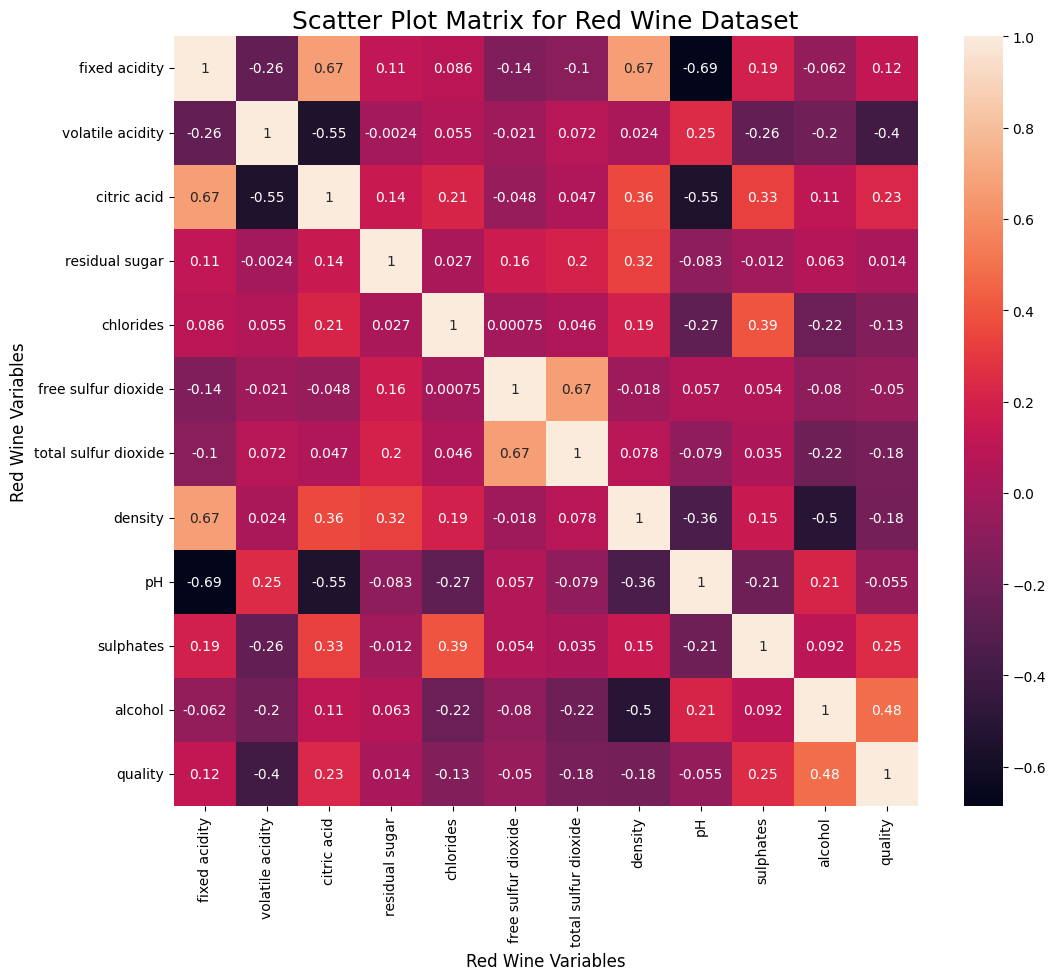

In [ ]:
### Look into pairwise correlation using all df_without_duplicates variable

plt.figure(figsize=(12,10)) ## Increase figure size as annotations are not showing up correctly by default in heatmap.
sns.heatmap(df_without_duplicates.corr(), annot=True) # Create heatmap chart to look into the correlation between columns and give a visualation on how the columns affect each other.
### Could change the color of the heatmap, but the default color is cool and looks easy to read
### Also debated changing the .corr numbers to be formatted with only 2 digits by adding fmt='.2f' but some of the values change to just 0.00 so leaving as default
plt.title('Correlation Matrix for Red Wine Dataset', fontsize=18)
plt.xlabel('Red Wine Variables', fontsize=12)
plt.ylabel('Red Wine Variables', fontsize=12);

### Based on heatmap and annotations will write the pair of columns that have the greatest postive or negative correlations
### Will start the search with anything greater than .50 (postive) or lower than -.50 (negative)


### Columns highlighted with the high postive correlation (>= -0.5)
    ## Fixed acidity and Denisty (0.67)
    ## Fixed acidity and Citric Acid (0.67)
    ## Free Sulfur Dioxide and Total Sulfur Dioxide (0.67)

     ## **** All columns mentioned above have the same positive correlation


### Columns highlighted with the high negative correlation (<= -0.5) 
    ## Fixed acidity and Ph (-0.69)
    ## Volatile acidity and Citric Acid (-0.55)
    ## Citric Acid and Ph (-0.55)
    ## Density and Alchol (-0.5)

    ## **** The columns with the highest negative correlation are Fixed acidity and Ph (-0.69)
    
### Based on analysis above the most correlated are Fixed acidity and Ph (-0.69)


YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [9]:
#### Pick 3 Regression Model Classes from scikit-learn documentation (just pick will build in Problem 6)

#### Regression Model Class 1 - LinearRegression
    ### Provide a link to scikit-learn documentation
        ## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
    ### Provide a link to non scikit-learn documentation website describing how model works
        ## https://www.datacamp.com/tutorial/sklearn-linear-regression

#### Regression Model Class 2 - RandomForestRegressor
    ### Provide a link to scikit-learn documentation
        ## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
    ### Provide a link to non scikit-learn documentation website describing how model works
        ## https://www.analytixlabs.co.in/blog/random-forest-regression/

#### Regression Model Class 3 - GradientBoostingRegressor
    ### Provide a link to scikit-learn documentation
        ## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
    ### Provide a link to non scikit-learn documentation website describing how model works
        ## https://www.datarobot.com/blog/gradient-boosted-regression-trees/


YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Linear Regression L1 (MAE) Loss: 0.5067213236184596
Linear Regression L2 (MSE) Loss: 0.43120484332749554
Random Forest Regressor L1 (MAE) Loss: 0.18109639440765266
Random Forest Regressor L2 (MSE) Loss: 0.05723789551140544
Gradient Boosting Regressor L1 (MAE) Loss: 0.4066405924923636
Gradient Boosting Regressor L2 (MSE) Loss: 0.2640121801556321


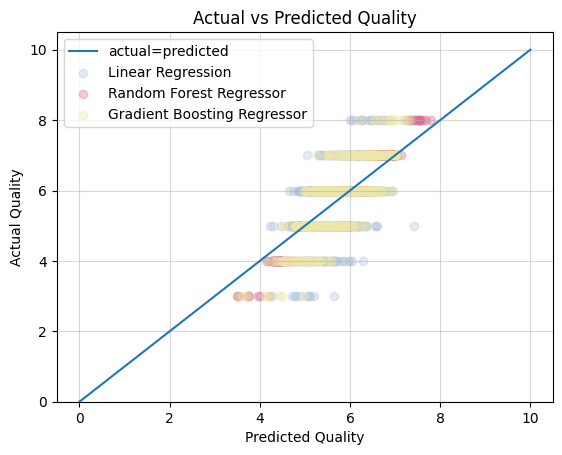

In [10]:
### Seperate Input Features and Output Target

df_target = df_without_duplicates["quality"] # Create variable df_target to store output target column
# df_target # used to check variable results
df_features = df_without_duplicates.drop(["quality"], axis=1)
# df_features # used to check variable results

### Define Functions to Compute L1 and L2 losses for each Class
## L1 Loss usually called Mean Absolute Error (MAE)

def mean_absolute_error(target, actual):
    error = target - actual
    return np.mean(np.abs(error))

## L2 Loss usually called Mean Squared Error (MSE)

def mean_squared_error(target, actual):
    error = target - actual
    error_squared = error * error
    return np.mean(error_squared)

#### Build Three Regression Model Classes
### Building LinearRegression Model

linear_model = sklearn.linear_model.LinearRegression() # Store LinearRegression function in variable linear_model
linear_model.fit(df_features,df_target)

### Checking the R squared score 
linear_model.score(df_features,df_target)

### LinearRegression Predicted Values

linear_prediction = linear_model.predict(df_features)
linear_prediction
linear_prediction.min(), linear_prediction.max() # predicted min and max values
df_target.min(), df_target.max()                 # actual min and max values

### LinearRegression L1 and L2 Losses
linear_mae = mean_absolute_error(linear_prediction, df_target)
linear_mse = mean_squared_error(linear_prediction, df_target)
print(f"Linear Regression L1 (MAE) Loss: {linear_mae}")
print(f"Linear Regression L2 (MSE) Loss: {linear_mse}")

### Building RandomForestRegressor Model

random_model = sklearn.ensemble.RandomForestRegressor() # Store RandomForestRegressor function in variable random_model
random_model.fit(df_features,df_target)

### Checking the R squared score  
random_model.score(df_features,df_target)

### RandomForestRegressor Predicted Values
random_prediction = random_model.predict(df_features)
random_prediction
random_prediction.min(), random_prediction.max() # predicted min and max values 
df_target.min(), df_target.max()                # actual min and max values

### RandomForestRegressor L1 and L2 Losses
random_mae = mean_absolute_error(random_prediction, df_target)
random_mse = mean_squared_error(random_prediction, df_target)
print(f"Random Forest Regressor L1 (MAE) Loss: {random_mae}")
print(f"Random Forest Regressor L2 (MSE) Loss: {random_mse}")


### Building GradientBoostingRegressor Model

gradient_model = sklearn.ensemble.GradientBoostingRegressor()
gradient_model.fit(df_features,df_target)

### Checking the R squared score  
gradient_model.score(df_features,df_target)

### GradientBoostingRegressor Predicted Values
gradient_prediction = gradient_model.predict(df_features)
gradient_prediction
gradient_prediction.min(), gradient_prediction.max() # predicted min and max values 
df_target.min(), df_target.max()                     # actual min and max values

### GradientBoostingRegressor L1 and L2 Losses
gradient_mae = mean_absolute_error(gradient_prediction, df_target)
gradient_mse = mean_squared_error(gradient_prediction, df_target)
print(f"Gradient Boosting Regressor L1 (MAE) Loss: {gradient_mae}")
print(f"Gradient Boosting Regressor L2 (MSE) Loss: {gradient_mse}")


#### Plotting Actual versus Predicted Values for All Models in One Chart


plt.plot([0,10],[0,10], label="actual=predicted")
plt.scatter(linear_prediction, df_target, color="lightsteelblue", label='Linear Regression', alpha=0.35) # why use regular blue when you can use lightsteelblue
# looked through https://matplotlib.org/stable/gallery/color/named_colors.html for colors to use for graph
plt.scatter(random_prediction, df_target, color="palevioletred", label='Random Forest Regressor', alpha=0.35)
plt.scatter(gradient_prediction, df_target, color="palegoldenrod", label='Gradient Boosting Regressor', alpha=0.35)
## Working on changing alpha scale as random_prediction and gradient_prediction have a lot of overlapping in the plots
plt.gca().set_ylim(0)
plt.legend()
plt.title("Actual vs Predicted Quality")
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.grid(True, alpha=0.5)

None





YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [11]:
#### Three Regression Models: Linear Regression,Random Forest Regressor,Gradient Boosting Regressor

### Five Fold Cross-Validation
    ## Evaulate each fold

### Compare L2 Losses Predicted by Cross Validation again L2 losses training against the whole data set

### Linear Regression Cross Validation

scoring = ['r2','neg_mean_squared_error'] # Creating a variable to specify the testing scores that I want used in cross_validate module. R2 and neg_mean_squared_error used to get L2 losses

# linear_train_features, linear_test_features, linear_train_target, Linear_test_target = sklearn.model_selection.train_test_split(df_features,df_target,test_size=0.20, random_state=2024) # commented this like out as this would split to use 20 percent of the dataset for training and the other 80 percent for testing and want to use whole datasset instead
linear_model_cv = sklearn.model_selection.cross_validate(linear_model,df_features,df_target,scoring=scoring,cv=5) #cross validate by default does a 5 fold but just to make it explict will add cv=5. Complete the cross compare on whole datatset instead of part of the dataset
linear_model_cv
linear_cross_r2 = linear_model_cv['test_r2']
linear_cross_r2 = linear_cross_r2.mean()
linear_cross_neg_mse = linear_model_cv['test_neg_mean_squared_error'] # returned as negative values
linear_cross_mse = -linear_cross_neg_mse # multiple negative numbers by negative to get positive values
linear_cross_mse = linear_cross_mse.mean() # Get the average mean squared error loss for cross validation
print(f"Linear Regression Cross Validation R2 score: {linear_cross_r2}")
print(f"Linear Regression Cross Validation L2 (MSE) Loss: {linear_cross_mse}")


#Predict L2 losses 

### Random Forest Regressor Cross Validation

random_model_cv = sklearn.model_selection.cross_validate(random_model,df_features,df_target,scoring=scoring,cv=5) #cross validate by default does a 5 fold but just to make it explict will add cv=5. Complete the cross compare on whole datatset instead of part of the dataset
random_model_cv
random_cross_r2 = random_model_cv['test_r2']
random_cross_r2 = random_cross_r2.mean()
random_cross_neg_mse = random_model_cv['test_neg_mean_squared_error'] # returned as negative values
random_cross_mse = -random_cross_neg_mse # multiple negative numbers by negative to get positive values
random_cross_mse = random_cross_mse.mean() # Get the average mean squared error loss for cross validation
print(f"Random Forest Regressor Cross Validation R2 score: {random_cross_r2}")
print(f"Random Forest Regressor Cross Validation L2 (MSE) Loss: {random_cross_mse}")

### Gradient Boosting Regressor Cross Validation

gradient_model_cv = sklearn.model_selection.cross_validate(gradient_model,df_features,df_target,scoring=scoring,cv=5) #cross validate by default does a 5 fold but just to make it explict will add cv=5. Complete the cross compare on whole datatset instead of part of the dataset
gradient_model_cv
gradient_cross_r2 = gradient_model_cv['test_r2']
gradient_cross_r2 = gradient_cross_r2.mean()
gradient_cross_neg_mse = gradient_model_cv['test_neg_mean_squared_error'] # returned as negative values
gradient_cross_mse = -gradient_cross_neg_mse # multiple negative numbers by negative to get positive values
gradient_cross_mse = gradient_cross_mse.mean() # Get the average mean squared error loss for cross validation
print(f"Gradient Boosting Regressor Cross Validation R2 score: {gradient_cross_r2}")
print(f"Gradient Boosting Regressor Cross Validation L2 (MSE) Loss: {gradient_cross_mse}")

print('\n\n')

print(f"Compare Predicted VS Cross Validation L2 (MSE) Losses:")
print(f"Linear Regression Predicted L2 (MSE) Loss: {linear_mse}")
print(f"Linear Regression Cross Validation L2 (MSE) Loss: {linear_cross_mse}")
print(f"Random Forest Regressor Predicted L2 (MSE) Loss: {random_mse}")
print(f"Random Forest Regressor Cross Validation L2 (MSE) Loss: {random_cross_mse}")
print(f"Gradient Boosting Regressor Predicted L2 (MSE) Loss: {gradient_mse}")
print(f"Gradient Boosting Regressor Cross Validation L2 (MSE) Loss: {gradient_cross_mse}")





Linear Regression Cross Validation R2 score: 0.29000919202879427
Linear Regression Cross Validation L2 (MSE) Loss: 0.45289729283317615
Random Forest Regressor Cross Validation R2 score: 0.3021073948468497
Random Forest Regressor Cross Validation L2 (MSE) Loss: 0.44806652512481004
Gradient Boosting Regressor Cross Validation R2 score: 0.3199308108289662
Gradient Boosting Regressor Cross Validation L2 (MSE) Loss: 0.4351392328353949



Compare Predicted VS Cross Validation L2 (MSE) Losses:
Linear Regression Predicted L2 (MSE) Loss: 0.43120484332749554
Linear Regression Cross Validation L2 (MSE) Loss: 0.45289729283317615
Random Forest Regressor Predicted L2 (MSE) Loss: 0.05723789551140544
Random Forest Regressor Cross Validation L2 (MSE) Loss: 0.44806652512481004
Gradient Boosting Regressor Predicted L2 (MSE) Loss: 0.2640121801556321
Gradient Boosting Regressor Cross Validation L2 (MSE) Loss: 0.4351392328353949


YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
#### Preprocess the data so each column has mean 0 and standard deviation 1
### Build 3 different regression models using sk-learn pipeline for each model (As per Piazza Answer: You should use the same models with standardized data)
### Compare L2 Losses Predicted vs Preprocessed data






YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
### RandomForestRegressor


YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
### From the models that built best model was Linear Regression. The L2 Loses from the Prediction Scores from Random Forest Regressor were good but the Cross Validation L2 losses scores shows there was overfitting occurring during the  

YOUR ANSWERS HERE